**gerekli kutuphanelerin eklenmesi**

---



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os

from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

import pickle
import cv2 as cv
import tensorflow as tf
from google.colab.patches import cv2_imshow

verilerin drivedan cekilmesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# once tek bir resim uzerinde denemeler yapalim
path_to_image = "/content/drive/MyDrive/transfer_learning/catsanddogs/PetImages/Dog/16.jpg"

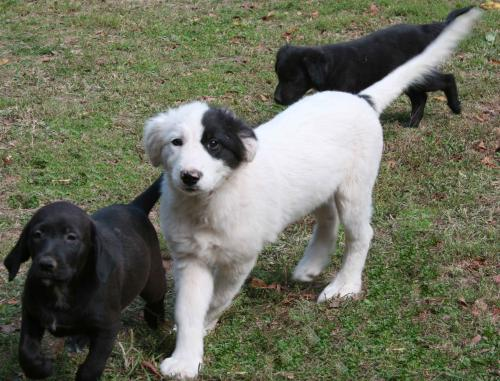

In [42]:
image = cv.imread(path_to_image, cv.IMREAD_COLOR)
cv2_imshow(image)

In [43]:
type(image)

numpy.ndarray

In [44]:
image

array([[[ 72, 106, 100],
        [ 69, 103,  97],
        [ 53,  87,  80],
        ...,
        [ 99, 118, 131],
        [106, 122, 135],
        [120, 136, 149]],

       [[ 78, 114, 108],
        [ 78, 114, 108],
        [ 57,  94,  86],
        ...,
        [ 79, 105, 119],
        [ 80, 103, 119],
        [ 86, 107, 122]],

       [[ 89, 128, 120],
        [ 96, 135, 127],
        [ 81, 120, 112],
        ...,
        [ 93, 129, 147],
        [ 86, 119, 139],
        [ 76, 109, 128]],

       ...,

       [[ 23,  34,  18],
        [ 21,  34,  20],
        [ 15,  27,  15],
        ...,
        [ 40,  64,  52],
        [ 31,  55,  45],
        [ 66,  90,  78]],

       [[ 31,  42,  26],
        [ 26,  36,  23],
        [ 12,  24,  12],
        ...,
        [ 58,  84,  66],
        [ 59,  85,  69],
        [ 57,  83,  65]],

       [[ 38,  49,  33],
        [ 31,  41,  28],
        [ 16,  28,  16],
        ...,
        [ 86, 115,  90],
        [ 95, 123, 100],
        [ 60,  89,  64]]

In [45]:
image.shape

(381, 500, 3)

**Resizing and Normalization**

---



In [46]:
resized = cv.resize(image, (128,128))

In [47]:
type(resized)

numpy.ndarray

In [48]:
resized

array([[[ 68, 105,  98],
        [ 84, 124, 110],
        [ 62, 106,  84],
        ...,
        [113, 167, 171],
        [ 64, 100, 121],
        [ 80, 104, 119]],

       [[ 69, 115, 103],
        [ 63, 106,  95],
        [ 40,  82,  69],
        ...,
        [ 97, 155, 179],
        [ 92, 137, 170],
        [132, 189, 216]],

       [[ 71, 125, 110],
        [ 57, 104,  93],
        [ 75, 115, 109],
        ...,
        [114, 165, 186],
        [ 94, 138, 165],
        [100, 161, 183]],

       ...,

       [[ 25,  39,  27],
        [ 23,  40,  31],
        [ 21,  34,  28],
        ...,
        [ 18,  41,  33],
        [ 28,  48,  37],
        [ 50,  63,  72]],

       [[ 40,  53,  41],
        [ 20,  34,  28],
        [ 24,  37,  35],
        ...,
        [ 21,  45,  41],
        [ 60,  82,  77],
        [ 91, 109, 110]],

       [[ 20,  30,  18],
        [ 18,  29,  29],
        [ 25,  34,  37],
        ...,
        [ 59,  83,  77],
        [ 44,  67,  62],
        [ 59,  85,  68]]

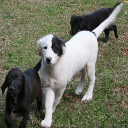

In [49]:
cv2_imshow(resized)

In [50]:
resized.shape

(128, 128, 3)

**On Isleme**

---



In [51]:
path_to_dataset = "/content/drive/MyDrive/transfer_learning/catsanddogs/PetImages"

# dataseti bu sekilde 2 kategoriye ayiralim: kediler ve kopekler
categories = ["Cat", "Dog"]

# verileri normalize edecegimiz fonksiyonu yazalim.
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

for category in categories:
  img_per_category = 0
  idx = categories.index(category)
  for image in os.listdir(f"{path_to_dataset}/{category}"):
    if img_per_category == 1000:
      break
    path_to_image = f"{path_to_dataset}/{category}/{image}"
    try:
      img = cv.imread(path_to_image, cv.IMREAD_COLOR)
      img = cv.resize(img, (128,128))
      img = normalize(img)
      images.append([img, idx])
      img_per_category += 1

    except Exception as e:
      error += 1
      errors_file.write(f"{error}) {e}\n")
    finally:
      number += 1
    print(f"\rCalistirilan: {number} | Hatalar: {error}", end="")

errors_file.close()

Calistirilan: 2004 | Hatalar: 4

In [52]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)

In [53]:
images[0][0].shape

(128, 128, 3)

In [54]:
print(np.array(images)[:,1])

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [55]:
for _ in range(10):
  random.shuffle(images)

np.array(images)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


array([0, 1, 0, ..., 1, 1, 0], dtype=object)

In [56]:
X = []
y = []
for image, idx in images:
  X.append(image)
  y.append(idx)

# x_train, y_train, x_val, y_val, x_tres, y_test verileri icin listeler olusturalim.
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [57]:
X_train = X[:1600]
y_train = y[:1600]

X_val = X[1600:1800]
y_val = y[1600:1800]

X_test = X[1800:]
y_test = y[1800:]

In [58]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

# dataseti ayirarak olusturdugumuz verileri yazdiralim.
print("x_train: ", len(X_train))
print("y_train: ", len(y_train))

print("x_val: ", len(X_val))
print("y_val: ", len(y_val))

print("x_test: ", len(X_test))
print("y_test: ", len(y_test))

x_train:  1600
y_train:  1600
x_val:  200
y_val:  200
x_test:  200
y_test:  200


In [59]:
# x_train, x_val ve x_test verilerinin boyutunu gorelim.
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [60]:
# x_train, y_train, x_val, y_val, x_test, y_test verilerini daha sonra kullanabilmek icin kaydedelim.
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)